In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linkedinuserprofiles/LinkedIn people profiles datasets.csv
/kaggle/input/linkedinuserprofiles/LinkedIn company information datasets (Public web data).csv


In [3]:
!pip install --upgrade --quiet  langchain langchain-community  langchain-experimental neo4j

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.8.3 requires cubinlinker, which is not installed.
cudf 24.8.3 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 24.8.3 requires ptxcompiler, which is not installed.
cuml 24.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 24.8.3 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 24.8.3 requires cuda-python<12.0a0,>=11.7.1, but you have cuda-python 12.6.0 which is incompatible.
distributed 2024.7.1 requires dask==2024.7.1, but you have dask 2024.9.1 which is incompatible.
google-cloud-bigquery 2.34.4 requires packaging<22.0dev,>=14.3, but you have packaging 24.1 which is incompatible.
jupyterlab 4.2.5 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which 

In [5]:
!pip install langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.7 MB/s eta 0:00:00


In [6]:
import pandas as pd
import json
import os
from langchain_community.graphs import Neo4jGraph
from langchain.chains import GraphCypherQAChain
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_community.llms import HuggingFaceHub

In [10]:
# Gemini (https://aistudio.google.com/app/apikey)
gemini_api = "SET YOURS!"

# Hugging Face (if we want to use open source LLM)
hf_api = "SET YOURS!"

# Neo4j 
neo4j_url = "SET YOURS!"
neo4j_user = "SET YOURS!"
neo4j_password = "SET YOURS!"

# https://api.python.langchain.com/en/latest/graphs/langchain_community.graphs.neo4j_graph.Neo4jGraph.html
graph = Neo4jGraph(neo4j_url,neo4j_user,neo4j_password)

In [11]:
df = pd.read_csv('/kaggle/input/linkedinuserprofiles/LinkedIn people profiles datasets.csv') 
df.head()

,timestamp,id,name,city,country_code,region,current_company:company_id,current_company:name,position,following,...,people_also_viewed,educations_details,education,avatar,languages,certifications,recommendations,recommendations_count,volunteer_experience,сourses
0,2023-01-10,catherinemcilkenny,"Catherine Fitzpatrick (McIlkenny), B.A",Canada,CA,NaN,NaN,NaN,Snr Business Analyst at Emploi et Développemen...,NaN,...,"[{""profile_link"":""https://ca.linkedin.com/in/l...",Queen's University Belfast,"[{""degree"":""Bachelor of Arts (B.A.) Honours"",""...",https://media.licdn.com/dms/image/C4E03AQEcz_j...,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-17,margot-bon-51a04624,Margot Bon,"The Randstad, Netherlands",NL,EU,gemeente-utrecht,Gemeente Utrecht,Communicatieadviseur Corporate & Strategie Gem...,NaN,...,"[{""profile_link"":""https://nl.linkedin.com/in/j...",NaN,"[{""degree"":""Scrum en Agile werken"",""end_year"":...",https://static.licdn.com/sc/h/244xhbkr7g40x6bs...,"[{""subtitle"":""Professional working proficiency...","[{""meta"":""Issued Jun 2013"",""subtitle"":""Van der...",Menno H. Poort “Ik werk al jaren prettig met M...,2.0,"[{""cause"":"""",""duration"":""Sep 2010 Jul 2020 9 y...",NaN
2,2023-05-17,mike-dean-8509a193,Mike Dean,"England, United Kingdom",UK,NaN,network-rail,Network Rail,Network Data Manager at Network Rail,NaN,...,"[{""profile_link"":""https://uk.linkedin.com/in/g...",Brighton Polytechnic,"[{""degree"":""2:2"",""end_year"":""1991"",""field"":""El...",https://media.licdn.com/dms/image/C4D03AQHLj-Z...,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-05-29,giovanna-panarella-99a0a4167,Giovanna Panarella,"Avellino, Campania, Italy",IT,EU,NaN,Freelance,Architetto (Freelance),500.0,...,"[{""profile_link"":""https://it.linkedin.com/in/e...",Università di Camerino,"[{""degree"":""“Corso di aggiornamento profession...",https://media-exp1.licdn.com/dms/image/C4D03AQ...,NaN,NaN,NaN,NaN,"[{""cause"":""Arts and Culture"",""duration"":""Jan 2...",NaN
4,2022-12-06,steve-latimer-3364327,Steve Latimer,"Ontario, Canada",CA,NaN,mid-range-computer-group-inc.,Mid-Range Computer Group Inc.,Senior Account Executive at Mid-Range Computer...,NaN,...,"[{""profile_link"":""https://ca.linkedin.com/in/d...",St. Michael's College School,"[{""degree"":"""",""end_year"":""1978"",""field"":"""",""me...",NaN,NaN,"[{""meta"":""Issued Jan 2022 See credential"",""sub...","Blake Reeves “If I was a customer, I would wan...",1.0,NaN,NaN


In [12]:
def extract_industry(json_str):
    try:
        data = json.loads(json_str)
        return data.get('industry', None)
    except json.JSONDecodeError:
        return None

def extract_languages(json_list):
    try:
        languages = [entry['title'] for entry in json.loads(json_list)]
        return '|'.join(languages)
    except: 
        return None

def extract_country(string):
    if isinstance(string, str):
        elements = string.split(',')
        return elements[-1].strip()  
    else:
        return None

df['industry'] = df['current_company'].apply(lambda x: extract_industry(x))
df['languages'] = df['languages'].apply(lambda x: extract_languages(x))
df['country'] = df['city'].apply(lambda x: extract_country(x))
df = df [['id','name','current_company:name','educations_details','languages','industry','country']].dropna()
industry_counts = df['industry'].value_counts()
df = df[df['industry'].isin(industry_counts[industry_counts > 2].index)].reset_index(drop=True)
df = df.rename(columns={'current_company:name': 'company','educations_details':'education'})
df.head(10)

,id,name,company,education,languages,industry,country
0,paul-lukes-906608134,Paul Lukes,Toolbox Creative,California College of the Arts,English|Czech,Advertising Services,United States
1,roberto-merola-baa923103,Roberto Merola,Capgemini,Université libre de Bruxelles,English|Italian|French|Dutch|German,IT Services and IT Consulting,Belgium
2,minju-hong-bsn-rn-1a7801239,"Minju Hong, BSN, RN",University of Washington Medical Center,University of Washington School of Nursing,Korean|English,Hospitals and Health Care,United States
3,prateek-chitpur-710a1a12a,Prateek Chitpur,George Mason University,George Mason University Education George Mason...,English|Hindi|Marathi|Kannada|Telugu,Higher Education,United States
4,aadcampos,Alexandre Campos,Serpro - Serviço Federal de Processamento de D...,Unichristus,English,IT Services and IT Consulting,Brazil
5,gareth-reid-75966110b,Gareth Reid,Willis Towers Watson,University of Leicester,English|French|Spanish,Financial Services,United Kingdom
6,alaa-el-said-56740659,Alaa El-said,Microsoft,Mansoura University,Arabic|English,Software Development,Saudi Arabia
7,bagus-satya-mas,Bagus Satya Mas,Jatis Mobile,Universitas Udayana (UNUD),Indonesian|English|Japanese,Software Development,Indonesia
8,emrecruit,Emily S.,Dignity Health,Ottawa University,Spanish,Hospitals and Health Care,Greater Phoenix Area
9,giteshpatel21,Gitesh Patel,Baptist Health System KY & IN,Sullivan University,English|Hindi|Gujarati,Hospitals and Health Care,United States


In [16]:
df.to_csv("pre_processed_linkedin_profiles.csv")

In [13]:
graph.refresh_schema()
print(graph.schema)

Node properties:

Relationship properties:

The relationships:



In [17]:
people_query = """
LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/AylinNaebzadeh/Knowledge-Graph-GenAIK/main/pre_processed_linkedin_profiles.csv'
AS row
MERGE (person:Person {name: row.name})
MERGE (company:Company {name: row.company})
MERGE (school:School {name: row.education})
MERGE (industry:Industry {name: row.industry})
MERGE (country:Country {name: row.country})

FOREACH (lang in split(row.languages, '|') | 
    MERGE (language:Language {name:trim(lang)})
    MERGE (person)-[:SPEAKS]->(language))

MERGE (person)-[:WORKS_IN]->(company)
MERGE (person)-[:LIVES_IN]->(country)
MERGE (person)-[:EDUCATED_AT]->(school)
MERGE (company)-[:IS_IN]->(industry)
"""

graph.query(people_query)

[]

In [18]:
graph.refresh_schema()
print(graph.schema)

Node properties:
Person {name: STRING}
Company {name: STRING}
School {name: STRING}
Industry {name: STRING}
Country {name: STRING}
Language {name: STRING}
Relationship properties:

The relationships:
(:Person)-[:SPEAKS]->(:Language)
(:Person)-[:WORKS_IN]->(:Company)
(:Person)-[:LIVES_IN]->(:Country)
(:Person)-[:EDUCATED_AT]->(:School)
(:Company)-[:IS_IN]->(:Industry)


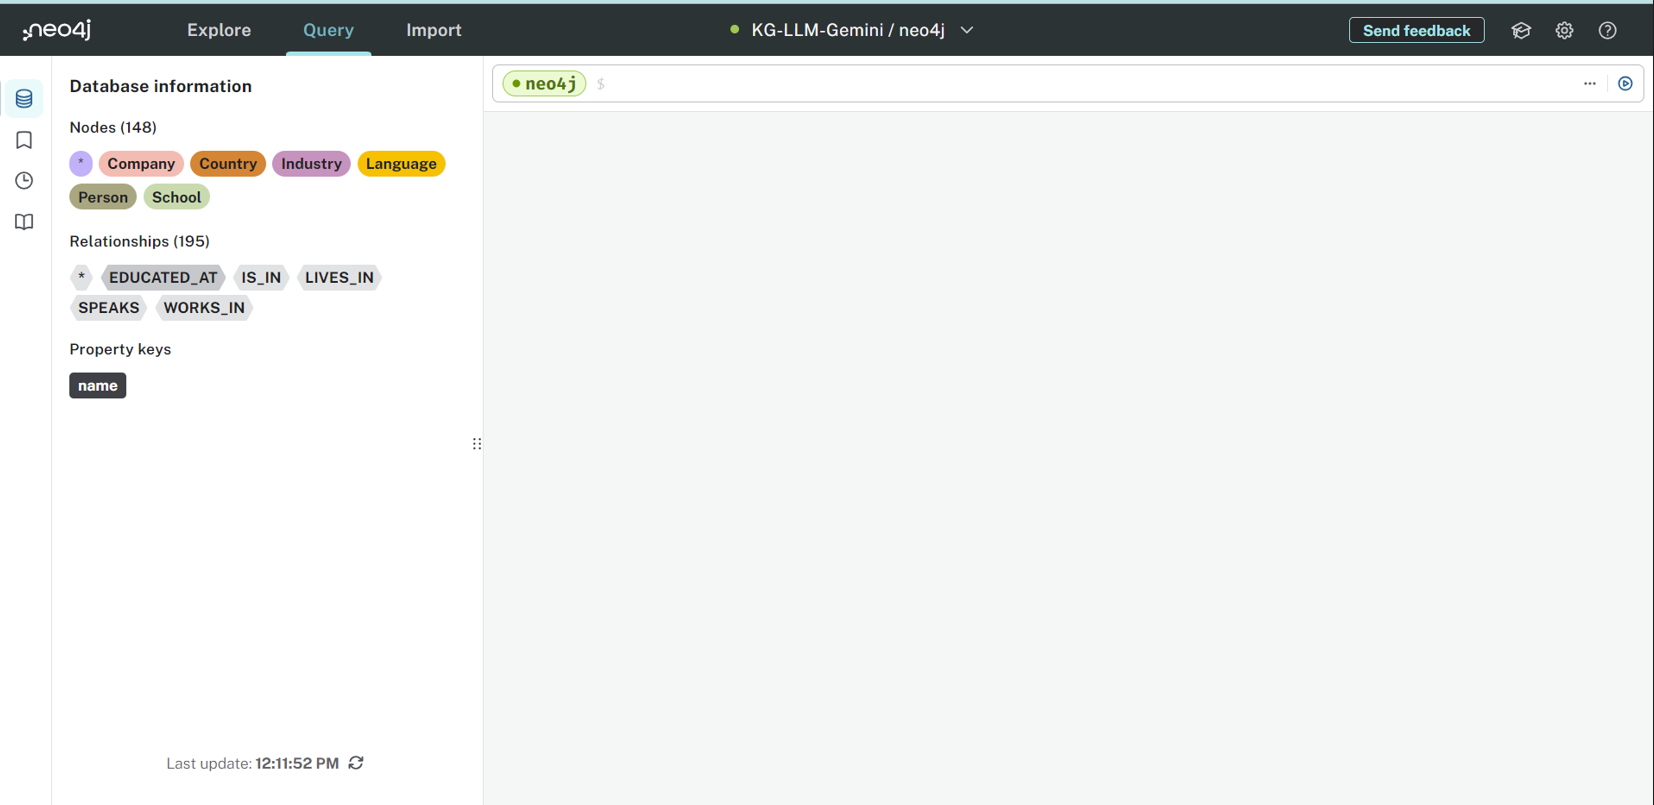

In [20]:
llm = ChatGoogleGenerativeAI(model="gemini-pro", google_api_key=gemini_api, temperature = 0)
chain = GraphCypherQAChain.from_llm(graph=graph, llm=llm, verbose=True, allow_dangerous_requests=True)

In [21]:
questions = ["List all companies in advertising services industry!",
             "A worker who graduated from Simon Fraser University is currently employed at?",
             "Where is Paul Lukes working?",
             "A worker residing in Canada who is proficient in Vietnamese?",
             "How many worker in United States speak Urdu?"]
for q in questions:
    print('====== START ======')
    print(chain.invoke(q)['result'])
    print('====== END ====== \n')

====== START ======


> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (c:Company)-[:IS_IN]->(i:Industry)
WHERE i.name = "Advertising Services"
RETURN c.name
Full Context:
[{'c.name': 'Toolbox Creative'}, {'c.name': 'Baked Advertising'}, {'c.name': 'Search Engine People'}]

> Finished chain.
Toolbox Creative, Baked Advertising, Search Engine People
====== END ====== 

====== START ======


> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (p:Person)-[:EDUCATED_AT]->(s:School {name: "Simon Fraser University"})-[:IS_IN]->(i:Industry)<-[:IS_IN]-(c:Company)<-[:WORKS_IN]-(p)
RETURN c.name
Full Context:
[]

> Finished chain.
I do not have that information.
====== END ====== 

====== START ======


> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (p:Person {name: "Paul Lukes"})-[:WORKS_IN]->(c:Company) RETURN c.name
Full Context:
[{'c.name': 'Toolbox Creative'}]

> Finished chain.
I don't know the answer.
====== END ====== 

====== START ==

In [22]:
examples= [
    {
        "question": "Which workers speak French?",
        "query": "MATCH (p:Person)-[:SPEAKS]->(l:Language {{name: 'French'}}) RETURN p.name",
    },
    {
        "question": "What industries are workers named Emily associated with?",
        "query": "MATCH (p:Person {{name: 'Emily'}})-[:WORKS_IN]->(c:Company)-[:IS_IN]->(i:Industry) RETURN i.name",
    },
    {
        "question": "Which workers live in Canada and speak German?",
        "query": "MATCH (p:Person)-[:LIVES_IN]->(:Country {{name: 'Canada'}}), (p)-[:SPEAKS]->(:Language {{name: 'German'}}) RETURN p.name",
    },
    {
        "question": "In which countries do workers who speak Spanish live?",
        "query": "MATCH (p:Person)-[:SPEAKS]->(:Language {{name: 'Spanish'}})<-[:SPEAKS]-(worker:Person)-[:LIVES_IN]->(c:Country) RETURN DISTINCT c.name AS Country",
    },
    {
        "question": "What companies do workers named John work in?",
        "query": "MATCH (p:Person {{name: 'John'}})-[:WORKS_IN]->(c:Company) RETURN c.name",
    },
    {
        "question":"How many workers in Hospital and Health Care industry able to speak Korea",
        "query": "MATCH (p:Person)-[:WORKS_IN]->(:Company)-[:IS_IN]->(:Industry {{name: 'Hospitals and Health Care'}}),(p)-[:SPEAKS]->(:Language {{name: 'Korean'}}) RETURN COUNT(DISTINCT p) AS NumberOfWorkers",
    },
    {
        "question": "What companies are located in the technology industry?",
        "query": "MATCH (c:Company)-[:IS_IN]->(:Industry {{name: 'Technology'}}) RETURN c.name",
    },
    {
        "question": "Where do workers named Alice live?",
        "query": "MATCH (p:Person {{name: 'Alice'}})-[:LIVES_IN]->(c:Country) RETURN c.name",
    },
]

In [23]:
from langchain_core.prompts import FewShotPromptTemplate, PromptTemplate

example_prompt = PromptTemplate.from_template(
    "User input: {question}\nCypher query: {query}"
)
prompt = FewShotPromptTemplate(
    examples=examples[:3],
    example_prompt=example_prompt,
    prefix="You are a Neo4j expert. Given an input question, create a syntactically correct Cypher query to run.\n\nHere is the schema information\n{schema}.\n\nBelow are a number of examples of questions and their corresponding Cypher queries.",
    suffix="User input: {question}\nCypher query: ",
    input_variables=["question", "schema"],
)

In [24]:
print(prompt.format(question="Where do Michael work?", schema="foo"))

You are a Neo4j expert. Given an input question, create a syntactically correct Cypher query to run.

Here is the schema information
foo.

Below are a number of examples of questions and their corresponding Cypher queries.

User input: Which workers speak French?
Cypher query: MATCH (p:Person)-[:SPEAKS]->(l:Language {name: 'French'}) RETURN p.name

User input: What industries are workers named Emily associated with?
Cypher query: MATCH (p:Person {name: 'Emily'})-[:WORKS_IN]->(c:Company)-[:IS_IN]->(i:Industry) RETURN i.name

User input: Which workers live in Canada and speak German?
Cypher query: MATCH (p:Person)-[:LIVES_IN]->(:Country {name: 'Canada'}), (p)-[:SPEAKS]->(:Language {name: 'German'}) RETURN p.name

User input: Where do Michael work?
Cypher query: 


In [26]:
chain2 = GraphCypherQAChain.from_llm(graph=graph, llm=llm, cypher_prompt=prompt, verbose=True, allow_dangerous_requests=True)

In [27]:
questions = ["List all companies in advertising services industry!",
             "A worker who graduated from Simon Fraser University is currently employed at?",
             "Where is Paul Lukes working?",
             "A worker residing in Canada who is proficient in Vietnamese?",
             "How many worker in United States speak Urdu?"]
for q in questions:
    print('====== START ======')
    print(chain2.invoke(q)['result'])
    print('====== END ====== \n')

====== START ======


> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (c:Company)-[:IS_IN]->(i:Industry {name: 'Advertising Services'}) RETURN c.name
Full Context:
[{'c.name': 'Toolbox Creative'}, {'c.name': 'Baked Advertising'}, {'c.name': 'Search Engine People'}]

> Finished chain.
Toolbox Creative, Baked Advertising, Search Engine People
====== END ====== 

====== START ======


> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (p:Person)-[:EDUCATED_AT]->(:School {name: 'Simon Fraser University'}), (p)-[:WORKS_IN]->(c:Company) RETURN c.name
Full Context:
[{'c.name': 'Elastic Path'}]

> Finished chain.
I do not have that information.
====== END ====== 

====== START ======


> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (p:Person {name: 'Paul Lukes'})-[:WORKS_IN]->(c:Company) RETURN c.name
Full Context:
[{'c.name': 'Toolbox Creative'}]

> Finished chain.
I don't know the answer.
====== END ====== 

====== START ======


> Enter

In [28]:
print(prompt.format(question="Where do Michael work?", schema="foo"))

You are a Neo4j expert. Given an input question, create a syntactically correct Cypher query to run.

Here is the schema information
foo.

Below are a number of examples of questions and their corresponding Cypher queries.

User input: Which workers speak French?
Cypher query: MATCH (p:Person)-[:SPEAKS]->(l:Language {name: 'French'}) RETURN p.name

User input: What industries are workers named Emily associated with?
Cypher query: MATCH (p:Person {name: 'Emily'})-[:WORKS_IN]->(c:Company)-[:IS_IN]->(i:Industry) RETURN i.name

User input: Which workers live in Canada and speak German?
Cypher query: MATCH (p:Person)-[:LIVES_IN]->(:Country {name: 'Canada'}), (p)-[:SPEAKS]->(:Language {name: 'German'}) RETURN p.name

User input: Where do Michael work?
Cypher query: 


In [29]:
from langchain_core.prompts import FewShotPromptTemplate, PromptTemplate

example_prompt = PromptTemplate.from_template(
    "User input: {question}\nCypher query: {query}"
)
prompt = FewShotPromptTemplate(
    examples=examples[:3],
    example_prompt=example_prompt,
    prefix="You are a Neo4j expert. Given an input question, create a syntactically correct Cypher query to run.\n\nHere is the schema information\n{schema}.\n\nBelow are a number of examples of questions and their corresponding Cypher queries.",
    suffix="User input: {question}\nCypher query: ",
    input_variables=["question", "schema"],
)

In [30]:
examples= [
    {
        "question": "Which workers speak French?",
        "query": "MATCH (p:Person)-[:SPEAKS]->(l:Language {{name: 'French'}}) RETURN p.name",
    },
    {
        "question": "What industries are workers named Emily associated with?",
        "query": "MATCH (p:Person {{name: 'Emily'}})-[:WORKS_IN]->(c:Company)-[:IS_IN]->(i:Industry) RETURN i.name",
    },
    {
        "question": "Which workers live in Canada and speak German?",
        "query": "MATCH (p:Person)-[:LIVES_IN]->(:Country {{name: 'Canada'}}), (p)-[:SPEAKS]->(:Language {{name: 'German'}}) RETURN p.name",
    },
    {
        "question": "In which countries do workers who speak Spanish live?",
        "query": "MATCH (p:Person)-[:SPEAKS]->(:Language {{name: 'Spanish'}})<-[:SPEAKS]-(worker:Person)-[:LIVES_IN]->(c:Country) RETURN DISTINCT c.name AS Country",
    },
    {
        "question": "What companies do workers named John work in?",
        "query": "MATCH (p:Person {{name: 'John'}})-[:WORKS_IN]->(c:Company) RETURN c.name",
    },
    {
        "question":"How many workers in Hospital and Health Care industry able to speak Korea",
        "query": "MATCH (p:Person)-[:WORKS_IN]->(:Company)-[:IS_IN]->(:Industry {{name: 'Hospitals and Health Care'}}),(p)-[:SPEAKS]->(:Language {{name: 'Korean'}}) RETURN COUNT(DISTINCT p) AS NumberOfWorkers",
    },
    {
        "question": "What companies are located in the technology industry?",
        "query": "MATCH (c:Company)-[:IS_IN]->(:Industry {{name: 'Technology'}}) RETURN c.name",
    },
    {
        "question": "Where do workers named Alice live?",
        "query": "MATCH (p:Person {{name: 'Alice'}})-[:LIVES_IN]->(c:Country) RETURN c.name",
    },
]

In [32]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 5.0 MB/s eta 0:00:00a 0:00:01


In [33]:
from langchain_community.vectorstores import Neo4jVector
from langchain_core.example_selectors import SemanticSimilarityExampleSelector
from langchain_community.embeddings import HuggingFaceEmbeddings

example_selector = SemanticSimilarityExampleSelector.from_examples(
    examples,
    HuggingFaceEmbeddings(),
    Neo4jVector,
    url = neo4j_url,
    username = neo4j_user,
    password = neo4j_password,
    k=3,
    input_keys=["question"],
)

/tmp/ipykernel_30/3151546236.py:7: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  HuggingFaceEmbeddings(),


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [34]:
example_selector.select_examples({"question": "Where do Michael work?"})

[{'query': "MATCH (p:Person {{name: 'John'}})-[:WORKS_IN]->(c:Company) RETURN c.name",
  'question': 'What companies do workers named John work in?'},
 {'query': "MATCH (p:Person {{name: 'Alice'}})-[:LIVES_IN]->(c:Country) RETURN c.name",
  'question': 'Where do workers named Alice live?'},
 {'query': "MATCH (p:Person {{name: 'Emily'}})-[:WORKS_IN]->(c:Company)-[:IS_IN]->(i:Industry) RETURN i.name",
  'question': 'What industries are workers named Emily associated with?'}]

In [35]:
dynamic_prompt = FewShotPromptTemplate(
    example_selector=example_selector, #previous: examples = examples[:3]
    example_prompt=example_prompt,
    prefix="You are a Neo4j expert. Given an input question, create a syntactically correct Cypher query to run.\n\nHere is the schema information\n{schema}.\n\nBelow are a number of examples of questions and their corresponding Cypher queries.",
    suffix="User input: {question}\nCypher query: ",
    input_variables=["question", "schema"],
)

In [36]:
print(dynamic_prompt.format(question="Where do Michael work?", schema="foo"))

You are a Neo4j expert. Given an input question, create a syntactically correct Cypher query to run.

Here is the schema information
foo.

Below are a number of examples of questions and their corresponding Cypher queries.

User input: What companies do workers named John work in?
Cypher query: MATCH (p:Person {name: 'John'})-[:WORKS_IN]->(c:Company) RETURN c.name

User input: Where do workers named Alice live?
Cypher query: MATCH (p:Person {name: 'Alice'})-[:LIVES_IN]->(c:Country) RETURN c.name

User input: What industries are workers named Emily associated with?
Cypher query: MATCH (p:Person {name: 'Emily'})-[:WORKS_IN]->(c:Company)-[:IS_IN]->(i:Industry) RETURN i.name

User input: Where do Michael work?
Cypher query: 
